In [ ]:
import pandas as pd
import numpy as np
import gpflow
import matplotlib.pyplot as plt
import pickle

from utils import preprocess
from models import Poisson_Model
%matplotlib inline


In [43]:
data = pd.read_csv('../data/gp_weekly_grid_parkslope.csv')
data['DATETIME'] = pd.to_datetime(data['DATETIME'])

X_train, y_train, X_test, y_test, train, test = preprocess(data, start_date= '2017/01/01',\
                                                      training_end_date='2017/12/31', \
                                                       testing_end_date='2018-02-28')

e_s = (39.270244500000004 / data.GRID_SQUARE.max())

In [44]:
m = Poisson_Model(X_train,y_train,use_priors=True, e_s= e_s, period = 52)

m.as_pandas_table()

,class,prior,transform,trainable,shape,fixed_shape,value
VGP/q_sqrt,Parameter,None,LoTri->vec,True,"(1, 2544, 2544)",True,"[[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0..."
VGP/q_mu,Parameter,None,(none),True,"(2544, 1)",True,"[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0...."
VGP/kern/periodic/period,Parameter,None,+ve,True,(),True,52.0
VGP/kern/periodic/lengthscales,Parameter,"N([ 0.],[ 1.])",+ve,True,(),True,1.0
VGP/kern/periodic/variance,Parameter,"N([ 0.],[ 1.])",+ve,True,(),True,1.0
VGP/kern/rbf_1/lengthscales,Parameter,"N([ 0.],[ 1.])",+ve,True,(),True,1.0
VGP/kern/rbf_1/variance,Parameter,"N([ 0.],[ 1.])",+ve,True,(),True,1.0
VGP/kern/rbf_2/lengthscales,Parameter,"N([ 0.],[ 1.])",+ve,True,(),True,1.0
VGP/kern/rbf_2/variance,Parameter,"N([ 0.],[ 1.])",+ve,True,(),True,1.0
VGP/kern/rbf_2/lengthscales,Parameter,"N([ 0.],[ 1.])",+ve,True,(),True,1.0


In [45]:
m.compile()
opt = gpflow.train.ScipyOptimizer()
m.compute_log_likelihood()

-16162.143270615488

In [46]:
opt.minimize(m, maxiter = 1000)

INFO:tensorflow:Optimization terminated with:
  Message: b'STOP: TOTAL NO. of ITERATIONS EXCEEDS LIMIT'
  Objective function value: 2028.554715
  Number of iterations: 1001
  Number of functions evaluations: 1075


In [47]:
m.as_pandas_table()

,class,prior,transform,trainable,shape,fixed_shape,value
VGP/q_sqrt,Parameter,None,LoTri->vec,True,"(1, 2544, 2544)",True,"[[[0.535519046153, 0.0, 0.0, 0.0, 0.0, 0.0, 0...."
VGP/q_mu,Parameter,None,(none),True,"(2544, 1)",True,"[[-2.95835746319], [-0.146517658976], [0.41693..."
VGP/kern/periodic/period,Parameter,None,+ve,True,(),True,68.72572473084789
VGP/kern/periodic/lengthscales,Parameter,"N([ 0.],[ 1.])",+ve,True,(),True,1.1249007014458283
VGP/kern/periodic/variance,Parameter,"N([ 0.],[ 1.])",+ve,True,(),True,1.0842967726257087
VGP/kern/rbf_1/lengthscales,Parameter,"N([ 0.],[ 1.])",+ve,True,(),True,0.772724995991406
VGP/kern/rbf_1/variance,Parameter,"N([ 0.],[ 1.])",+ve,True,(),True,0.026600227491910006
VGP/kern/rbf_2/lengthscales,Parameter,"N([ 0.],[ 1.])",+ve,True,(),True,0.11473082239560584
VGP/kern/rbf_2/variance,Parameter,"N([ 0.],[ 1.])",+ve,True,(),True,2.0277149761858695
VGP/kern/rbf_2/lengthscales,Parameter,"N([ 0.],[ 1.])",+ve,True,(),True,0.11473082239560584


In [51]:
pred = m.predict_y(X_test)
test['pred'] = pred[0]

In [52]:
test.groupby('GRID_SQUARE')['COUNT'].sum().sort_values(ascending = False).head()

GRID_SQUARE
33.0    40.0
44.0    16.0
21.0    15.0
12.0    13.0
38.0    12.0
Name: COUNT, dtype: float64

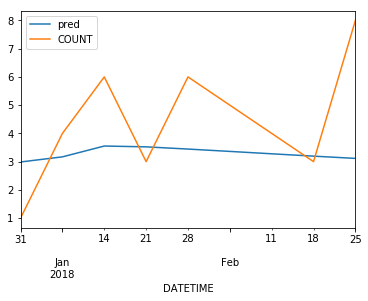

In [53]:
test[test.GRID_SQUARE == 33][['pred','COUNT']].plot()

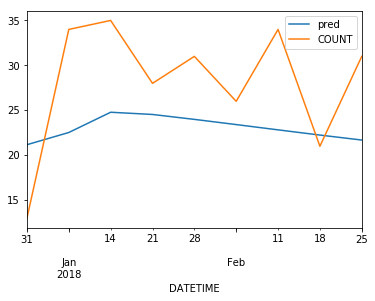

In [54]:
test.groupby(level = [0]).sum()[['pred','COUNT']].plot()

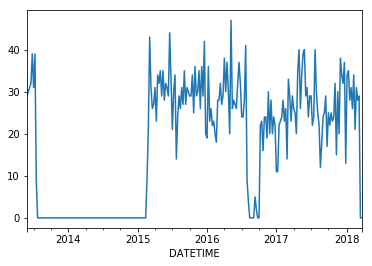

In [55]:
data.groupby('DATETIME')['COUNT'].sum().plot()

In [ ]:
pred[1].shape

In [ ]:
plotter = pd.DataFrame()

plotter['pred'] = np.reshape(pred[0], (len(pred[0],)))
plotter['y_test'] = y_test

In [ ]:
plotter.plot()